# Artificial Neural Network (ANN)

In [ ]:
pip install tensorflow
# pip install tensorflow-gpu
pip install keras

## import tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# # D16data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [ ]:
dataset = pd.read_csv('D16data1.csv')
dataset.shape

(10000, 14)

In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## null check

In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## EDA

In [ ]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### hist: Gender

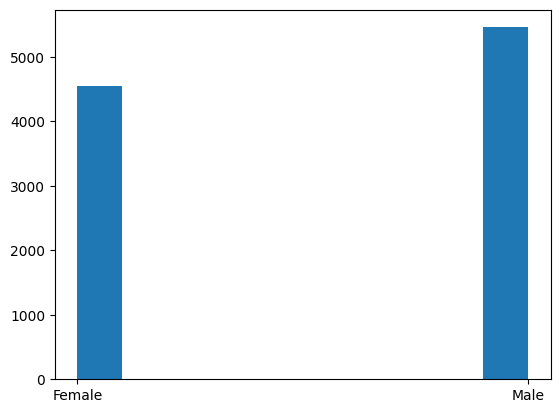

In [ ]:
plt.hist(x=dataset['Gender'])
plt.show()

### hist: Age

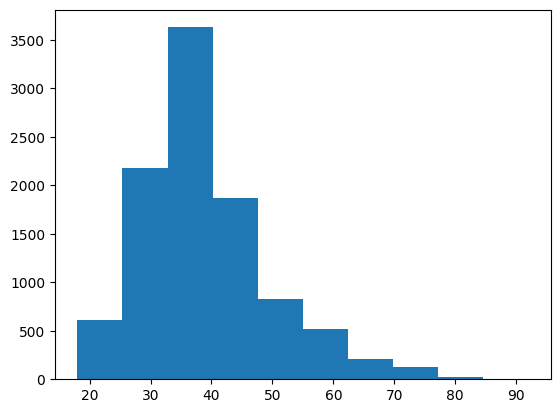

In [ ]:
plt.hist(x=dataset['Age'])
plt.show()

### hist: Geography

In [ ]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

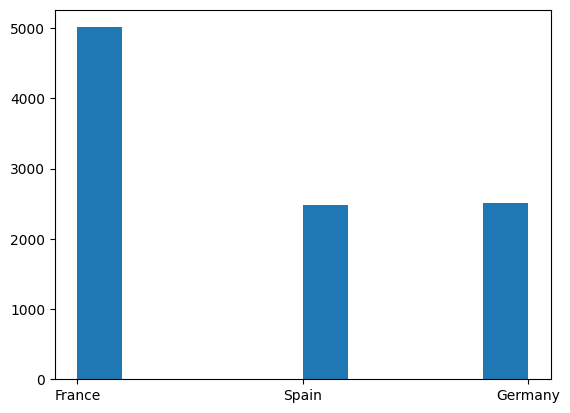

In [ ]:
plt.hist(dataset['Geography'])
plt.show()

## classification criteria: identify X & Y

In [ ]:
x = dataset.iloc[ : , 3:-1].values
x[:5]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [ ]:
y = dataset.iloc[ : , -1].values
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

## Preprocessing

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
la = LabelEncoder()

In [ ]:
x[ : , 1] = la.fit_transform(x[ : , 1])
x[:5]

array([[619, 0, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [ ]:
x[ : , 2] = la.fit_transform(x[ : , 2])
x[:5]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]], dtype=object)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)
x[:2]

array([[-0.32622142, -0.90188624, -1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752,  0.19816383, -1.38753759,
         0.11735002, -0.91158349, -1.54776799,  0.97024255,  0.21653375]])

## splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Modeling : ANN

In [ ]:
# initialize ANN
ann = tf.keras.models.Sequential()

### adding input layer

In [ ]:
# adding input layer & the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### adding another input layer

In [ ]:
# adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### adding output layer

In [ ]:
# adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### compiling the model

In [ ]:
# compiling the ANN model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the ANN model

In [ ]:
ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5687 - accuracy: 0.7610
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7983
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8049
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8076
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8110
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8129
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4086 - accura

## Prediction

In [ ]:
y_pred = ann.predict(x_test)
y_pred[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.18556872],
       [0.29198548],
       [0.14576535],
       [0.06885878],
       [0.05560081]], dtype=float32)

## transforming prediction
- based on threshold

In [ ]:
y_pred = (y_pred > 0.5)
y_pred[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

## Evaluation

### confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

### accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

# Natural Language Processing

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

## 1. Tokenization
- Is the process of dividing the whole text into tokens
- It is maily of two types
    - Word Tokenization (separated by words)
    - Sentence Tokenizer (separated by sentence)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
text = 'Hello there, how are you doing today? The weather is great today. The sky is blue. Python is awesome.'

In [ ]:
print(sent_tokenize(text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'Python is awesome.']


In [ ]:
print(word_tokenize(text))

['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'Python', 'is', 'awesome', '.']


## 2. Stopword

In [ ]:
from nltk.corpus import stopwords

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.corpus import stopwords

In [ ]:
text = 'he is a good boy, he is very good in coding'
text = word_tokenize(text)
text

['he',
 'is',
 'a',
 'good',
 'boy',
 ',',
 'he',
 'is',
 'very',
 'good',
 'in',
 'coding']

In [ ]:
text_with_no_stopword = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopword

['good', 'boy', ',', 'good', 'coding']

## 3. Stemming
- convert the derived words into root word

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
example = ['earn', 'earning', 'earned', 'earns']
for w in example:
    print(ps.stem(w))

earn
earn
earn
earn


## 4. Lemmatizing

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
example = ['history', 'formality', 'changes', 'histori']
for w in example:
    print(lemmatizer.lemmatize(w))

history
formality
change
histori


## 5. Wordnet

In [ ]:
from nltk.corpus import wordnet

In [ ]:
synonyms = []
antonyms = []
for syn in wordnet.synsets('happy'):
    for i in syn.lemmas():
        synonyms.append(i.name())
        if i.antonyms():
            antonyms.append(i.antonyms()[0].name())
print(set(synonyms))
print(set(antonyms))

{'happy', 'well-chosen', 'glad', 'felicitous'}
{'unhappy'}


## 6. Part of Speech Tagging

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
text = 'he is a good boy, he is very good in coding'
text = word_tokenize(text)
text

['he',
 'is',
 'a',
 'good',
 'boy',
 ',',
 'he',
 'is',
 'very',
 'good',
 'in',
 'coding']

In [ ]:
nltk.pos_tag(text)

[('he', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('boy', 'NN'),
 (',', ','),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('in', 'IN'),
 ('coding', 'VBG')]

## 7. Bag of Words
- what we want to use for our application as input data
- tab separated file

# NLP Application

## import libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# D14data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [ ]:
dataset = pd.read_csv('D16data2.tsv', sep='\t')
dataset.shape

(1000, 2)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## download stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import re
corpus = []
ps = PorterStemmer()
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review
              if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

## identify X & Y

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1500)

In [ ]:
x = cv.fit_transform(corpus).toarray()
x[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
y = dataset.iloc[ : , 1].values
y[:2]

array([1, 0], dtype=int64)

## splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

## Naive-Bayes Model

### Modeling

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = GaussianNB()

### Training

In [ ]:
classifier.fit(x_train, y_train)

GaussianNB()

### predict

In [ ]:
y_pred = classifier.predict(x_test)
y_pred[:5]

array([1, 1, 1, 0, 0], dtype=int64)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.73

In [ ]:
confusion_matrix(y_test, y_pred)

array([[55, 42],
       [12, 91]], dtype=int64)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Modeling

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')

### Training

In [ ]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction

In [ ]:
y_pred = dt_classifier.predict(x_test)
y_pred[:5]

array([0, 0, 1, 0, 1], dtype=int64)

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.71

In [ ]:
confusion_matrix(y_test, y_pred)

array([[74, 23],
       [35, 68]], dtype=int64)

## Random Forest

### Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=500, criterion='gini', random_state=0)

### Training

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

### Prediction

In [ ]:
rf_classifier.predict(x_test)
rf_classifier[:5]

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315)]

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.71

In [ ]:
confusion_matrix(y_test, y_pred)

array([[74, 23],
       [35, 68]], dtype=int64)

        Soch ko badloge toh sitare badal jayenge
        Disha ko badloge toh manzil badal jayegi
- Note: do not try to brain wash disha and manzil